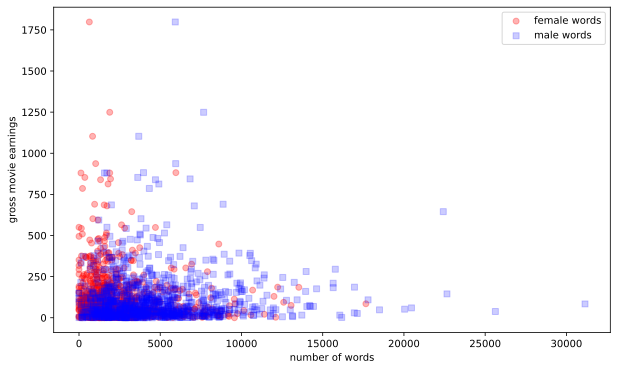

In [6]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# To get nicer plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg') # Output as svg. Else you can try png
from IPython.core.pylabtools import figsize
figsize(10, 6) # Width and hight
np.set_printoptions(precision=3);

filePath = 'train.csv'

train_data = np.loadtxt(filePath, delimiter=',', dtype=str)
figsize(10, 6) # Width and hight
np.set_printoptions(precision=3);

number_of_female_words = np.array(train_data[1:, 0], dtype=int)
number_of_male_words = np.array(train_data[1:, 7], dtype=int)
gross_earnings = np.array(train_data[1:, 8], dtype=float)

plt.scatter(number_of_female_words, gross_earnings, c='red', marker='o', alpha=0.3, label='female words')
plt.scatter(number_of_male_words, gross_earnings, c='blue', marker='s', alpha=0.2, label='male words')
plt.xlabel("number of words")
plt.ylabel("gross movie earnings")
plt.legend()

In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')
df.head()

df['Lead'] = df['Lead'].map({'Female': 1, 'Male': 0})
X = df.drop(['Lead'], axis=1)
y = df['Lead']

In [368]:
## CREATE train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=55)

In [361]:
## CREATE pipeline to scale and perform knn on the data
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0.5, 0, 'K')

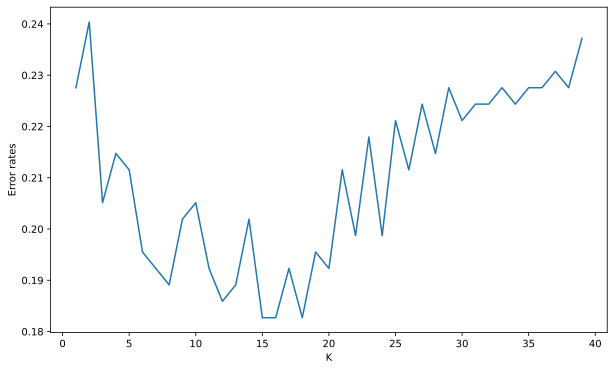

In [362]:
#try classifier
k_values = range(1,40)
test_error_rates = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    y_pred = knn_model.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    test_error_rates.append(error)
    
plt.plot(k_values, test_error_rates)
plt.ylabel('Error rates')
plt.xlabel('K')

# Train-test split report
From the above graph, we notice we have the least error rate at k=15, 16, 18. Let's pick k=15 and get a classification report.

In [ ]:
from sklearn.metrics import classification_report

In [310]:
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [311]:
print(classification_report(y_test, y_pred))
#Accuracy
print(f"Accuracy: {np.mean(y_pred == y_test):.3f}")

              precision    recall  f1-score   support

           F       0.85      0.30      0.45        76
           M       0.81      0.98      0.89       236

    accuracy                           0.82       312
   macro avg       0.83      0.64      0.67       312
weighted avg       0.82      0.82      0.78       312

Accuracy: 0.817


In [312]:
knn_model = KNeighborsClassifier(n_neighbors=16)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))
#Accuracy
print(f"Accuracy: {np.mean(y_pred == y_test):.3f}")

              precision    recall  f1-score   support

           F       0.81      0.33      0.47        76
           M       0.82      0.97      0.89       236

    accuracy                           0.82       312
   macro avg       0.81      0.65      0.68       312
weighted avg       0.82      0.82      0.79       312

Accuracy: 0.817


In [313]:
knn_model = KNeighborsClassifier(n_neighbors=18)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

#Accuracy
print(f"Accuracy: {np.mean(y_pred == y_test):.3f}")

              precision    recall  f1-score   support

           F       0.91      0.28      0.42        76
           M       0.81      0.99      0.89       236

    accuracy                           0.82       312
   macro avg       0.86      0.63      0.66       312
weighted avg       0.83      0.82      0.78       312

Accuracy: 0.817


# Updating features to provide more information
Let's try improving the quality of the features used to see if our f1-score for each classification is improved.

In [46]:
df.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,F
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,M
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,M
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,M
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,M


In [314]:
# def getTotalWords(row, gender='F'):
#     if gender == 'F':
#         if row['Lead'] == 'F':
#             return row['Number of words lead'] + row['Number words female']
#         else:
#             return (row['Number of words lead'] - row['Difference in words lead and co-lead']) + row['Number words female']
            
#     elif gender == 'M':
#         if row['Lead'] == 'M':
#             return row['Number of words lead'] + row['Number words male']
#         else:
#             return (row['Number of words lead'] - row['Difference in words lead and co-lead']) + row['Number words male']


#df['Total male words'] = df.apply(lambda row: getTotalWords(row, gender='M'), axis=1)
#df['Total female words'] = df.apply(lambda row: getTotalWords(row, gender='F'), axis=1)
df.head()


,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,F
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,M
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,M
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,M
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,M


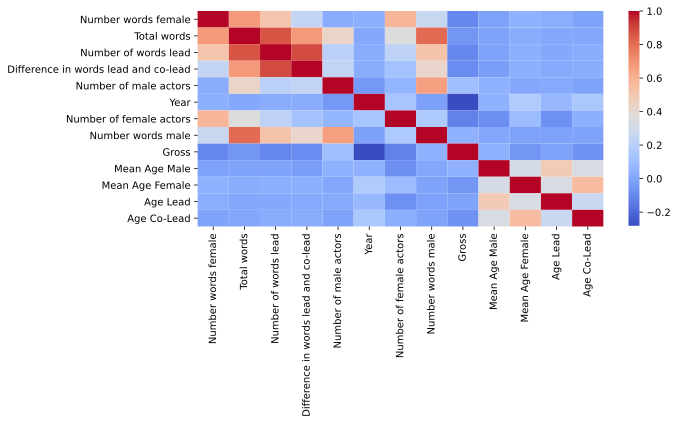

In [363]:
sns.heatmap(df.corr(), cmap='coolwarm')
plt.tight_layout()
plt.savefig('feature_corr.png', dpi=200, pad_inches=0)

,Number words female,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead
0,1512,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0
1,1524,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0
2,155,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0
3,1073,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0
4,1317,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0


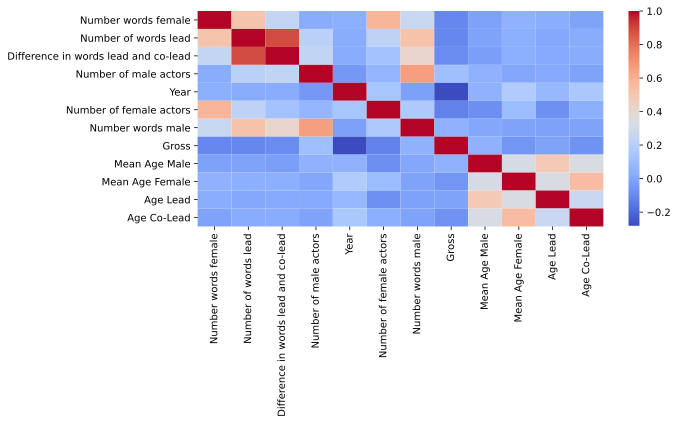

In [369]:
X_new = df.drop(['Total words', 'Lead'], axis=1)
sns.heatmap(X_new.corr(), cmap='coolwarm')
plt.tight_layout()
plt.savefig('feature_corr_updated.png', dpi=200, pad_inches=0)
X_new.head()

In [370]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [371]:
#scale inputs
scaler.fit(X_train)

StandardScaler()

Text(0.5, 0, 'K')

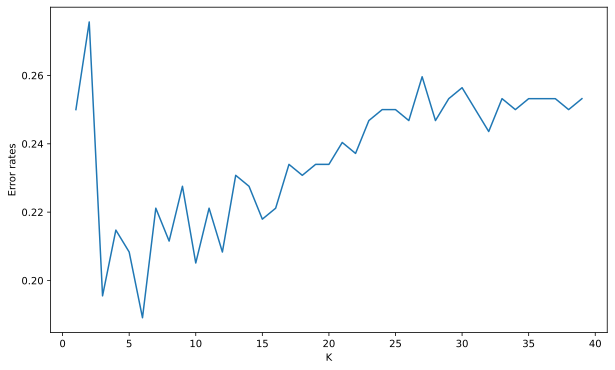

In [372]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#retry classifier
k_values = range(1,40)
test_error_rates = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    y_pred = knn_model.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    test_error_rates.append(error)
    
plt.plot(k_values, test_error_rates)
plt.ylabel('Error rates')
plt.xlabel('K')

# Post feature selection update
We now notice that the error rate is greatly minimized at k = 6. Let's get a classification report for that

In [345]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))

#Accuracy
print(f"Accuracy: {np.mean(y_pred == y_test):.3f}")

              precision    recall  f1-score   support

           F       0.72      0.46      0.56        82
           M       0.83      0.93      0.88       230

    accuracy                           0.81       312
   macro avg       0.77      0.70      0.72       312
weighted avg       0.80      0.81      0.80       312

Accuracy: 0.811


# Using Cross validation with GridSearchCV
We will now apply cross validation with GridSearchCV across our two setups to get a final sense of performance across different parameters

In [346]:
#set up pipeline
from sklearn.pipeline import Pipeline

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=57)
scaler = StandardScaler()
knn = KNeighborsClassifier()

operations = [('scaler', scaler), ('knn', knn)]
pipeline = Pipeline(steps=operations)

perform gridsearch across multiple values of k and other parameters and report back the best parameters

In [374]:
from sklearn.model_selection import GridSearchCV
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [375]:
k_values = range(1, 30)
weights = ['uniform', 'distance']
metrics = ['minkowski', 'manhattan', 'euclidean']

param_grid = {'knn__n_neighbors':k_values, 'knn__metric':metrics, 'knn__weights': weights }
cv_classifier = GridSearchCV(pipeline, param_grid, cv=12, scoring='accuracy')

In [376]:
cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=12,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['minkowski', 'manhattan', 'euclidean'],
                         'knn__n_neighbors': range(1, 30),
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [377]:
cv_classifier.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=14))])

In [378]:
from sklearn.metrics import confusion_matrix

y_pred = cv_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {np.mean(y_pred == y_test):.3f}")

[[11 10]
 [ 2 81]]
              precision    recall  f1-score   support

           F       0.85      0.52      0.65        21
           M       0.89      0.98      0.93        83

    accuracy                           0.88       104
   macro avg       0.87      0.75      0.79       104
weighted avg       0.88      0.88      0.87       104

Accuracy: 0.885


In [379]:
model = KNeighborsClassifier(metric='manhattan', n_neighbors=14)

from sklearn.model_selection import cross_validate
scores = cross_validate(model,X_train,y_train,
                         scoring=['accuracy'],cv=5)
scores = pd.DataFrame(scores)
scores.mean()

fit_time         0.003342
score_time       0.008692
test_accuracy    0.790374
dtype: float64